Importing all the necessary libraries


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Set matplotlib default style
mpl.style.use('seaborn-darkgrid')

In [ ]:
df_train = pd.read_csv('/content/training.zip')
df_train.head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [ ]:
df_train.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,2268.000000,2268.000000,2270.000000,2270.000000,2225.000000,2225.000000,2270.000000,2270.000000,2236.000000,2236.000000,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,22.384504,38.033495,56.068513,29.332678,79.482826,29.734861,39.322137,29.502998,15.871177,30.428166,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,3.057122,2.910368,3.485485,3.078134,3.986224,3.773744,3.209641,3.106869,3.622533,3.865772,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,3.980117,25.123828,17.888717,15.859361,32.206432,10.522325,6.921014,16.476000,3.826243,13.224453,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,20.585808,36.534382,54.515587,27.617244,77.673916,27.667948,37.552286,27.790607,13.562183,28.206046,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,22.535954,37.867071,56.244975,29.528872,79.784229,29.773813,39.298848,29.569347,15.785709,30.320160,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,24.237701,39.415051,57.946415,31.158830,81.590720,31.835621,40.917160,31.251664,17.999040,32.654768,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,61.428580,70.746797,79.787831,60.875896,94.269957,60.500298,76.582388,62.083177,58.418216,66.751329,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [ ]:
df_train.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [ ]:
feature_col, target_cols = 'Image', list(df_train.drop('Image', axis=1).columns)

In [ ]:
df_train[target_cols] = df_train[target_cols].fillna(df_train[target_cols].mean())
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7049 non-null   float64
 1   left_eye_center_y          7049 non-null   float64
 2   right_eye_center_x         7049 non-null   float64
 3   right_eye_center_y         7049 non-null   float64
 4   left_eye_inner_corner_x    7049 non-null   float64
 5   left_eye_inner_corner_y    7049 non-null   float64
 6   left_eye_outer_corner_x    7049 non-null   float64
 7   left_eye_outer_corner_y    7049 non-null   float64
 8   right_eye_inner_corner_x   7049 non-null   float64
 9   right_eye_inner_corner_y   7049 non-null   float64
 10  right_eye_outer_corner_x   7049 non-null   float64
 11  right_eye_outer_corner_y   7049 non-null   float64
 12  left_eyebrow_inner_end_x   7049 non-null   float64
 13  left_eyebrow_inner_end_y   7049 non-null   float

In [ ]:
IMG_WIDTH  = 96
IMG_HEIGHT = 96
IMG_CHANNELS = 1

# Splitting  the `Image` column around delimiter `space` and 
# create a numpy array with `dtype=int`, finally reshape
# it according the defined height width, and channels
images = np.array(df_train[feature_col].str.split().tolist(), dtype='float').reshape(-1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
labels = df_train[target_cols].to_numpy()

In [ ]:
normalized_images = images / 255.

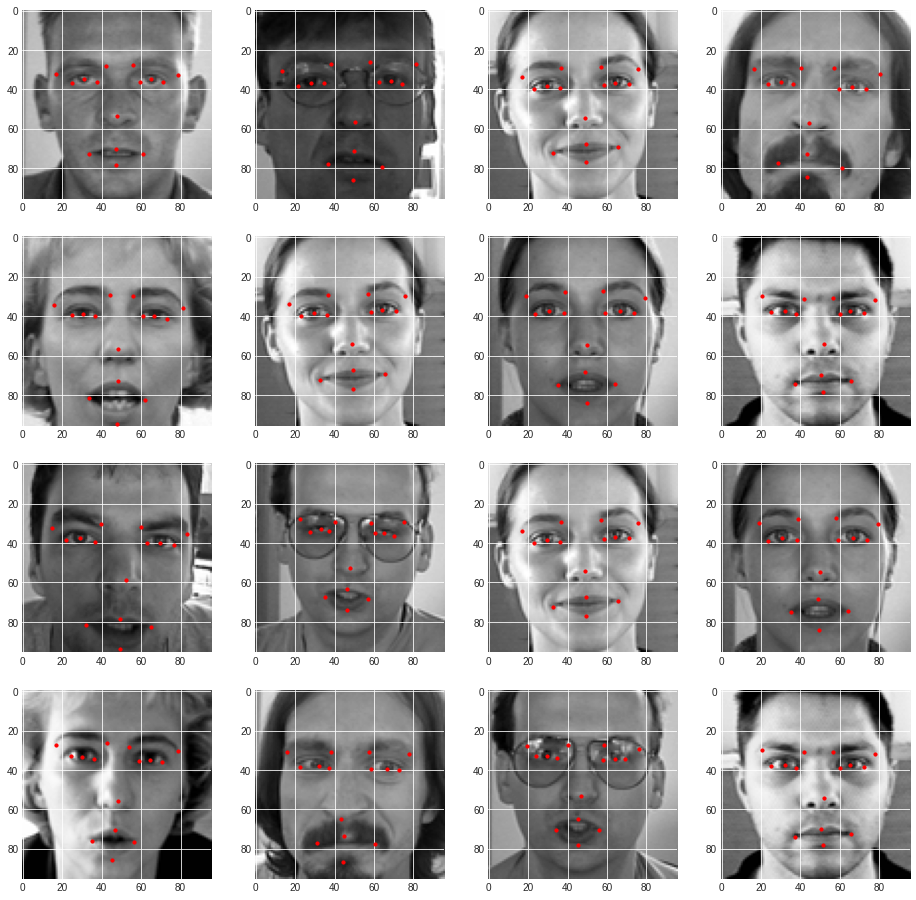

In [ ]:
def show_examples(images, landmarks):
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
    
    for img, marks, ax in zip(images, landmarks, axes.ravel()):
        # Keypoints
        x_points = marks[:: 2]
        y_points = marks[1::2]
        
        ax.imshow(img.squeeze(), cmap='gray')
        ax.scatter(x_points, y_points, s=10, color='red')
    
    plt.show()
    

idx = np.random.choice(16, 16)
show_examples(images[idx], labels[idx])

In [ ]:
train_images, valid_images, train_labels, valid_labels = train_test_split(normalized_images, labels, test_size=0.1, random_state=7)

In [ ]:
from tensorflow.keras.layers import (
    Input,
    Conv2D, 
    MaxPool2D, 
    Dense, 
    BatchNormalization, 
    ReLU, 
    Dropout, 
    Flatten,
    Dropout,
    Concatenate,
    GlobalAvgPool2D
)

from tensorflow.keras.regularizers import L2

def build_model():
    inputs = Input((96, 96, 1))
    
    x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPool2D()(x)
    
    x = Conv2D(filters=128, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters=128, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPool2D()(x)
    
    x = Conv2D(filters=256, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters=256, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters=256, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPool2D()(x)
    
    x = Flatten()(x)
    x = Dense(2048,kernel_regularizer=L2(l2=0.05))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Dense(512, kernel_regularizer=L2(l2=0.02))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Dense(128, kernel_regularizer=L2(l2=0.01))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Dense(30)(x)
    
    model = tf.keras.Model(inputs, outputs=x)
    return model

In [ ]:
model = build_model()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 96, 96, 1)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 96, 96, 64)        640       
_________________________________________________________________
batch_normalization_20 (Batc (None, 96, 96, 64)        256       
_________________________________________________________________
re_lu_20 (ReLU)              (None, 96, 96, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 96, 96, 64)        36928     
_________________________________________________________________
batch_normalization_21 (Batc (None, 96, 96, 64)        256       
_________________________________________________________________
re_lu_21 (ReLU)              (None, 96, 96, 64)        0   

In [ ]:
ckp_filepath = '/facial-keypoints-detection'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=ckp_filepath, 
                                                      monitor='val_mae', 
                                                      mode='auto',
                                                      save_best_only=True, 
                                                      save_weights_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.9, monitor='val_mae', 
                                                 mode='auto', cooldown=0, patience=5, verbose=1, min_lr=1e-5)

In [ ]:
EPOCHS = 200
BATCH_SIZE = 256

# if Path(ckp_filepath).exists():
#     model.load_weights(ckp_filepath)
    
history = model.fit(train_images, 
                    train_labels, 
                    validation_data=(valid_images, valid_labels), 
                    batch_size=BATCH_SIZE, epochs=EPOCHS,
                    callbacks=[model_checkpoint, reduce_lr])

Epoch 1/200
25/25 [==============================] - 45s 452ms/step - loss: 2770.1584 - mae: 47.2900 - val_loss: 2411.1533 - val_mae: 44.7009
Epoch 2/200
25/25 [==============================] - 8s 309ms/step - loss: 2490.9194 - mae: 45.7203 - val_loss: 2379.8462 - val_mae: 44.8507
Epoch 3/200
25/25 [==============================] - 8s 309ms/step - loss: 2274.5232 - mae: 43.7390 - val_loss: 2414.1667 - val_mae: 45.2821
Epoch 4/200
25/25 [==============================] - 8s 310ms/step - loss: 2068.3844 - mae: 41.4204 - val_loss: 2255.0945 - val_mae: 43.5316
Epoch 5/200
25/25 [==============================] - 8s 311ms/step - loss: 1863.0770 - mae: 38.8815 - val_loss: 1990.0312 - val_mae: 40.5824
Epoch 6/200
25/25 [==============================] - 8s 311ms/step - loss: 1648.5484 - mae: 36.1249 - val_loss: 1682.4039 - val_mae: 36.7136
Epoch 7/200
25/25 [==============================] - 8s 311ms/step - loss: 1437.0992 - mae: 33.1888 - val_loss: 1738.2054 - val_mae: 37.3955
Epoch 8/200


In [ ]:
#saving the  model to be used later
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


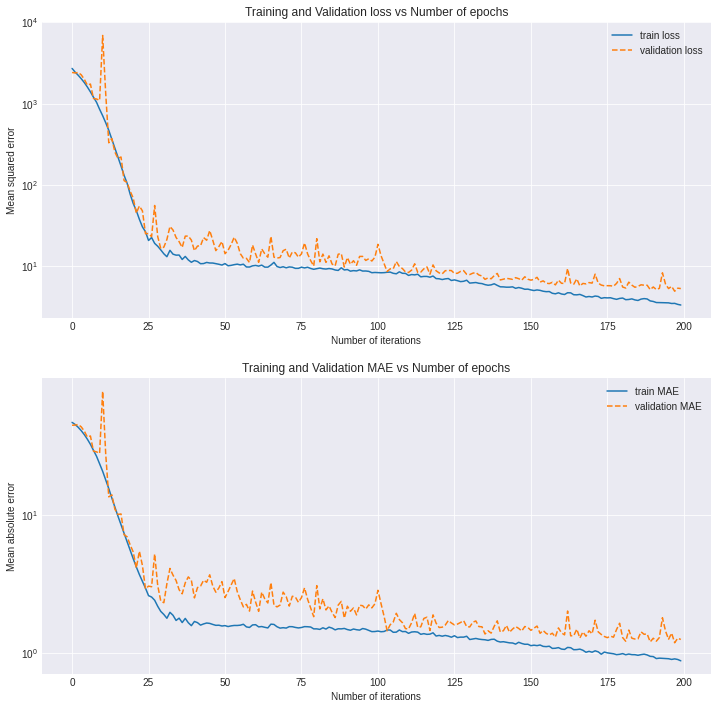

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

logs = history.history

n_epochs = range(len(logs['loss']))
train_loss, valid_loss = logs['loss'], logs['val_loss']
train_mae, valid_mae = logs['mae'], logs['val_mae']


ax1.plot(n_epochs, train_loss, label='train loss', linestyle='solid')
ax1.plot(n_epochs, valid_loss, label='validation loss', linestyle='dashed')
ax1.set(xlabel='Number of iterations', ylabel='Mean squared error', title='Training and Validation loss vs Number of epochs', yscale='log')
_ = ax1.legend()

ax2.plot(n_epochs, train_mae, label='train MAE', linestyle='solid')
ax2.plot(n_epochs, valid_mae, label='validation MAE', linestyle='dashed')
ax2.set(xlabel='Number of iterations', ylabel='Mean absolute error', title='Training and Validation MAE vs Number of epochs', yscale='log')
_ = ax2.legend()